In [1]:
# project preprocessing

In [2]:
import statsmodels.api as statsmodel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
from statsmodels.graphics.gofplots import qqplot
#Adult census dataset

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#import plotly.graph_objs as po
from sklearn import tree
#from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree




In [3]:
pwd


'/Users/saichaitanyadasari/Downloads'

In [4]:
df=pd.read_csv('Churn_Modelling.csv')
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [5]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#highly unbalanced dataset,
#lets describe data 
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
#means no missing values, has 10000 values for every column, 


In [8]:
### Chaitanya Code changes from here on 

In [9]:
# we are diving the  data into training set and test set the ration as 80/20 format
train, test = train_test_split(df, test_size=0.2)

In [10]:
# to show there are no missing values 
train.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
# visulaize the dimension of training data
train.shape

(8000, 11)

In [12]:
# check the unique values of each attribute in the training data
train.nunique()

CreditScore         456
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            5114
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    8000
Exited                2
dtype: int64

In [13]:
#  LET'S TRY TO VISUALIZE THE FEATURES ONE BY ONE  FOR TRAIN DATA

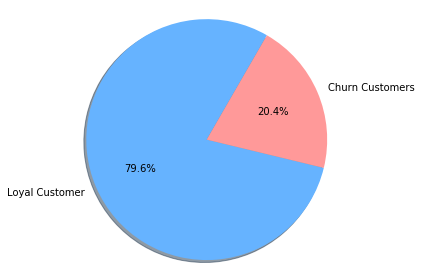

In [14]:
#No of exited vs Active  get the percentage split figure
ExitedValues = train.Exited.value_counts()
labels = ["Loyal Customer","Churn Customers"]
colors = ['#66b3ff', '#ff9999']
fig1, f1 = plt.subplots()
f1.pie(ExitedValues,labels=labels, colors = colors, autopct='%1.1f%%',shadow=True, startangle=60) 
f1.axis('equal')
plt.tight_layout()
plt.show()


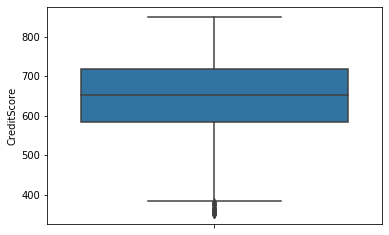

In [15]:
# CreditScore
sns.boxplot(train['CreditScore'] , orient = "v")

In [16]:
# there are few outliers for the above graph

In [17]:
#remove the records whose score is lessthan 400.

(array([  16.,  131.,  333.,  761., 1179., 1490., 1563., 1230.,  774.,
         523.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <a list of 10 Patch objects>)

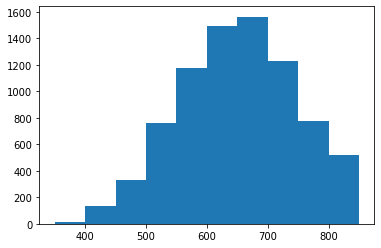

In [18]:
plt.hist(train['CreditScore'])

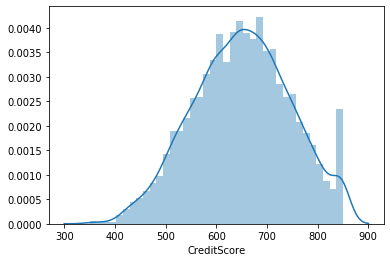

In [19]:
#credit score lets see the graph
sns.distplot(train['CreditScore'])

(array([2.889e+03, 5.500e+01, 2.850e+02, 9.440e+02, 1.674e+03, 1.395e+03,
        5.890e+02, 1.450e+02, 2.200e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <a list of 10 Patch objects>)

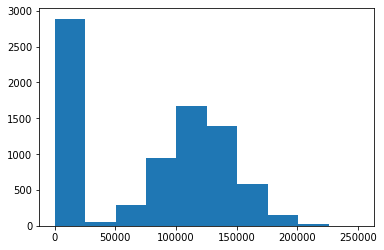

In [20]:
plt.hist(train['Balance'])

(array([ 987.,  968., 1006., 1027., 1002., 1027., 1007.,  982., 1009.,
         985.]),
 array([1.1580000e+01, 2.0009670e+04, 4.0007760e+04, 6.0005850e+04,
        8.0003940e+04, 1.0000203e+05, 1.2000012e+05, 1.3999821e+05,
        1.5999630e+05, 1.7999439e+05, 1.9999248e+05]),
 <a list of 10 Patch objects>)

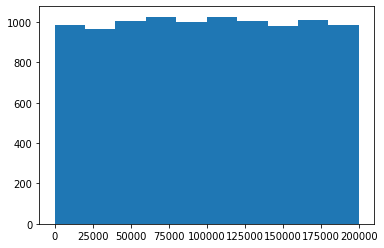

In [21]:
# lets see the graph for Estimated Salary  feature
plt.hist(df['EstimatedSalary'])

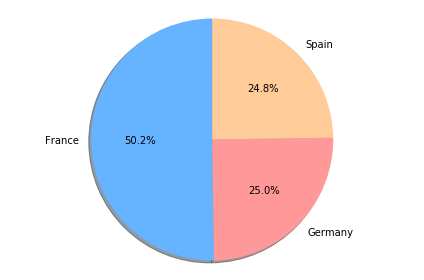

In [22]:
# this plot is to show how Geography play a role at the customer churn stuff
Geosplit = train.Geography.value_counts()
Geovalues  = train['Geography'].value_counts().values.tolist()
Geolabels  = train['Geography'].value_counts().keys().tolist()
colors = ['#66b3ff', '#ff9999' , '#ffcc99']
fig2, f2 = plt.subplots()
f2.pie(Geovalues,labels=Geolabels, colors = colors, autopct='%1.1f%%',shadow=True, startangle=90) 
# Equal aspect ratio ensures that pie is drawn as a circle
f2.axis('equal')
plt.tight_layout()
plt.show()


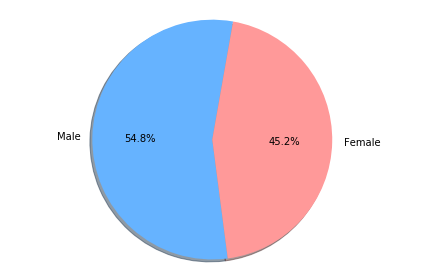

In [23]:
# this plot is to show how Gender play a role at the customer churn stuff
Gendervalues  = train['Gender'].value_counts().values.tolist()
GenderLabels = train['Gender'].value_counts().keys().tolist()
colors = ['#66b3ff', '#ff9999']
fig3, f3 = plt.subplots()
f3.pie(Gendervalues,labels=GenderLabels, colors = colors, autopct='%1.1f%%',shadow=True, startangle= 80) 
# Equal aspect ratio ensures that pie is drawn as a circle
f3.axis('equal')
plt.tight_layout()
plt.show()

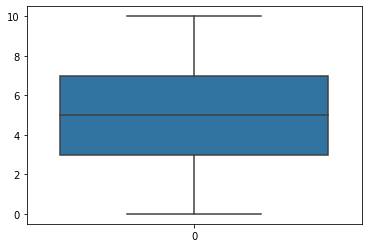

In [24]:
sns.boxplot(data= df['Tenure'], orient="v")

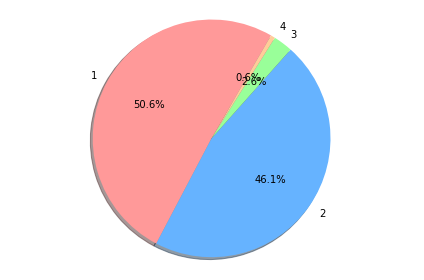

In [25]:
 # this plot is to show how Num of products split 
NumOfProdsvalues  = train['NumOfProducts'].value_counts().values.tolist()
NumOfProdslabels  = train['NumOfProducts'].value_counts().keys().tolist()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig4, f4 = plt.subplots()
f4.pie(NumOfProdsvalues ,labels=NumOfProdslabels, colors = colors,autopct='%1.1f%%',shadow=True, startangle=60) 
f4.axis('equal')
plt.tight_layout()
plt.show()

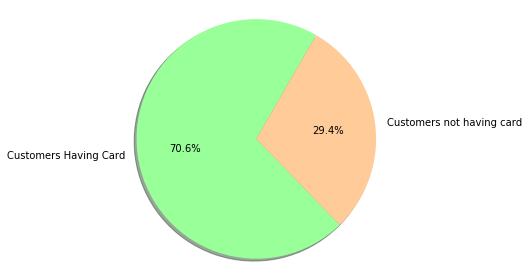

In [26]:
# this plot is to show how HasCrCard play a role at the customer churn 
HasCardvalues  = train['HasCrCard'].value_counts().values.tolist()
HasCardlabels  = ["Customers Having Card" , "Customers not having card"]
colors = ['#99ff99','#ffcc99']
fig5, f5 = plt.subplots()
f5.pie(HasCardvalues ,labels=HasCardlabels, colors = colors,autopct='%1.1f%%',shadow=True, startangle=60) 
f5.axis('equal')
plt.tight_layout()
plt.show()

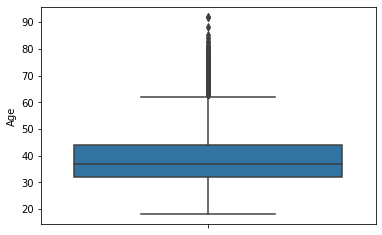

In [27]:
# lets have the flot for customers based on their age 
sns.boxplot(train['Age'] , orient = "v")

In [28]:
# Handling age column outliers
ageChange = []
for val in train.Age:
    if val <= 80:
        ageChange.append(val)
    else:
        ageChange.append(train.Age.median())
        
train.Age = ageChange

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


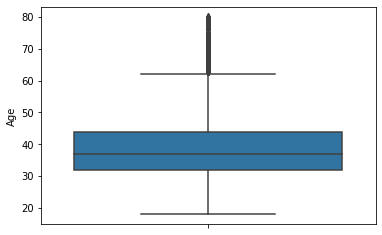

In [29]:
# lets have the flot for customers based on their age 
sns.boxplot(train['Age'] , orient = "v")

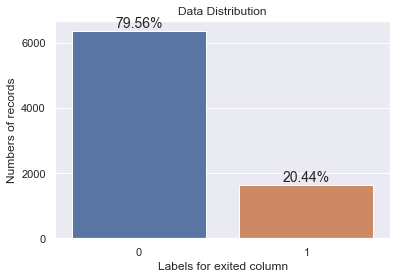

In [30]:
# Graphical representation of the target label percentage.
total_len = len(train['Exited'])
sns.set()
sns.countplot(train.Exited).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100 * (height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for exited column")
ax.set_ylabel("Numbers of records")
plt.show()

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


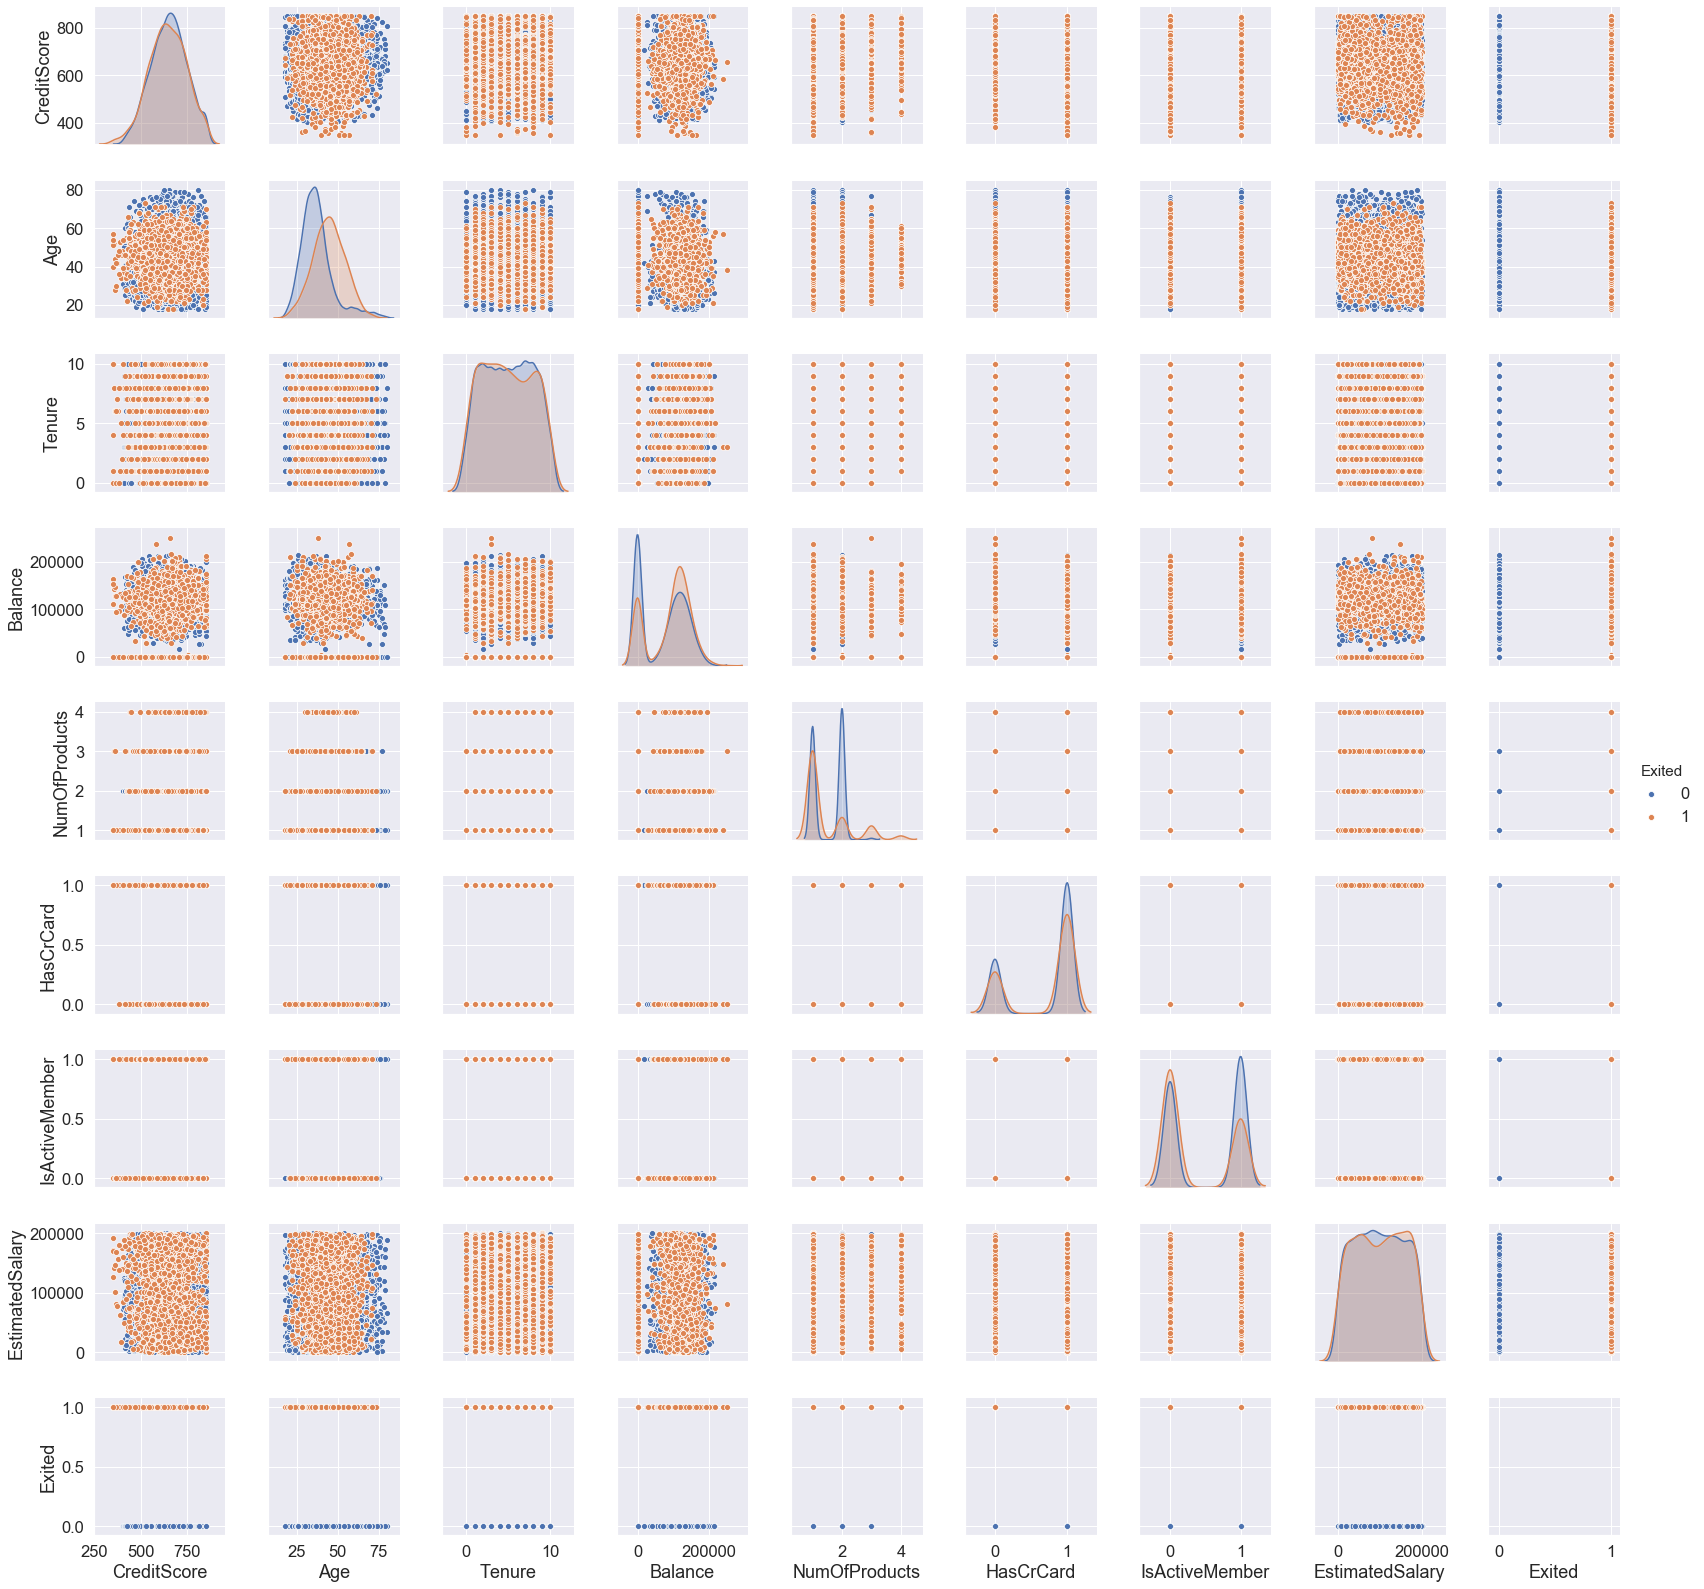

In [31]:
sns.pairplot(train, hue = 'Exited')
#please explain this, else remove

In [32]:
# let's see the correlation matrix of the data
df[train.columns].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


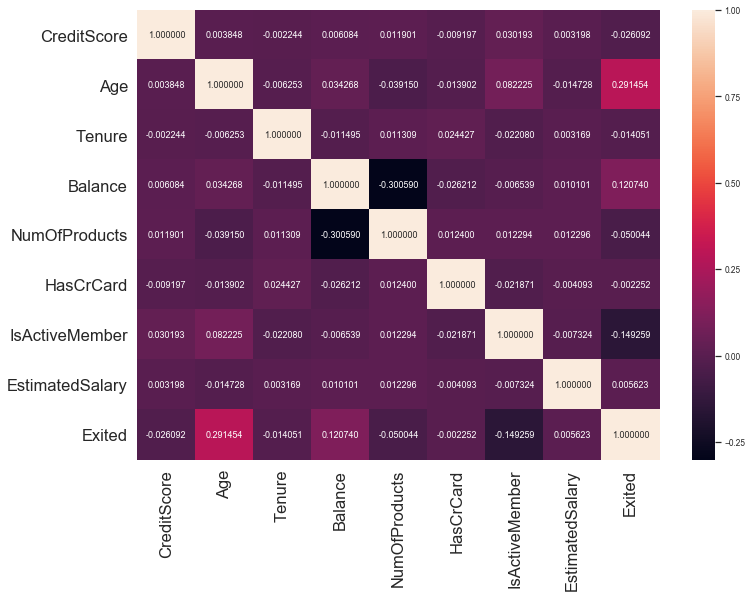

In [33]:
# generate the heatmap with te above data so that we can see what colums are corelated with the other one 
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set(font_scale = 0.75)
sns.heatmap(train.corr(), annot = True, fmt = ".6f")
plt.show()

In [34]:
# The above training data says the Age, Balance, and Estimated Salary positively correlates with Exited meaning as value increases exited being 1 is more probable
# whereas  creditscore,Tenure, NumofProducts, Hs Credit Card, isACtive member negatively correlates meaning the values of these increase chances of exiting lessens

In [35]:
# balance attribute is negatively correlated with numberofproducts attribute. It means one attribute increases as the other decreases, and vice versa.

In [36]:
# those who are doing the next part I would say THERE ARE FET OTHER THINGS FOR VISUALIZATION like 
# how many customers (%) having card/ no card left the bank ? and vice versa .  # one 
#how many customers (%)having gender male/female left the bank ? and vice versa # two
#how many customers (%)having is activemember/not activemember  left the bank ? and vice versa # three


In [37]:
# # Visualization of the Feature importances
# plt.title('Feature Importances')
# plt.bar(range(train.shape[1]), importances[indices], color = "green", align = "center")
# plt.xticks(range(train.shape[1]), features_label, rotation = 90)
# plt.show()

In [38]:
df['Exited'].value_counts()


0    7963
1    2037
Name: Exited, dtype: int64

In [39]:
from sklearn.utils import resample

In [40]:
df_majority = df[df.Exited==0]
df_minority = df[df.Exited==1]
df_minority_upsampled = resample(df_minority, replace=True,     # sample with replacement
                                 n_samples=7963,    # to match majority class
                                 random_state=123) # reproducible results
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [41]:
df_upsampled.Exited.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

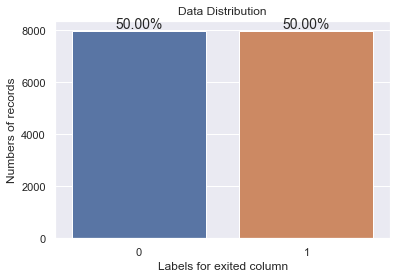

In [42]:
# Graphical representation of the target label percentage.
total_len = len(df_upsampled['Exited'])
sns.set()
sns.countplot(df_upsampled.Exited).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100 * (height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for exited column")
ax.set_ylabel("Numbers of records")
plt.show()

In [43]:
# apply baseline models 
# As the problem is of classification, we will apply logistic classification, decision trees and random forest to the problem to check the accuracy

In [44]:
df_new = df_upsampled

In [45]:
df_new.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [46]:
df_new=pd.get_dummies(df_new,drop_first=True)
    

In [47]:
df_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
6,822,50,7,0.00,2,1,1,10062.80,0,0,0,1
8,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1


In [48]:
df_new.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [49]:
scalar=StandardScaler()
scaled_df = scalar.fit_transform(df_new)
scaled_df = pd.DataFrame(scaled_df, columns=df_new.columns)
scaled_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.411051,-0.013924,-1.371202,0.024596,-0.752787,-1.540829,1.095458,0.210373,-1.0,-0.674114,1.838502,-1.013911
1,0.509622,-0.202651,-1.371202,-1.341635,0.749203,-1.540829,-0.912860,-0.114706,-1.0,-0.674114,-0.543921,-1.013911
2,2.037332,0.174803,-1.027609,0.704436,-0.752787,0.649001,1.095458,-0.370770,-1.0,-0.674114,1.838502,-1.013911
3,1.754048,0.835349,0.690358,-1.341635,0.749203,0.649001,1.095458,-1.569606,-1.0,-0.674114,-0.543921,0.986280
4,-1.493600,0.269167,-0.340422,0.974074,0.749203,-1.540829,1.095458,-0.442740,-1.0,-0.674114,-0.543921,0.986280


In [50]:
df_y=df_new.loc[:,'Exited']
df_x=df_new.drop('Exited',axis=1)

xtrain,xtest,ytrain,ytest=train_test_split(df_x,df_y,test_size=0.2, random_state=1)

In [51]:
ytest=ytest.reset_index(drop=True)

In [52]:
len(ytest)

3186

In [53]:
lr=LogisticRegression(penalty='l2',solver='lbfgs').fit(xtrain, ytrain)
ypredicted=pd.Series(lr.predict(xtest))
print(accuracy_score(ytest,ypredicted))

0.6597614563716259


In [54]:
# To get the weights of all the variables
weights = pd.Series(lr.coef_[0],index=xtrain.columns.values)
weights.sort_values(ascending = False)

Age                  0.056265
Geography_Germany    0.001110
Balance              0.000005
HasCrCard           -0.000001
EstimatedSalary     -0.000001
Geography_Spain     -0.000325
NumOfProducts       -0.000397
Tenure              -0.000626
Gender_Male         -0.001074
IsActiveMember      -0.001510
CreditScore         -0.003896
dtype: float64

In [55]:
dtree=DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=3).fit(xtrain,ytrain)
ypredicted=pd.Series(dtree.predict(xtest))
print(accuracy_score(ytest,ypredicted))

0.825172630257376


In [56]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)

neigh.fit(xtrain,ytrain) 

ypredknn=pd.DataFrame(neigh.predict(xtest))

accuracy_score(ytest,ypredknn)

0.7558066541117389

In [57]:
# chaitanya changes part 2 

In [58]:
# svm approch 
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='linear')
svm.fit(xtrain,ytrain)

In [ ]:
y_pred = svm.predict(xtest)
score = svm.score(xtest, ytest)
score

In [ ]:
# now Random Forest model and generate the importance of the features
features_label = xtrain.columns
forest = RandomForestClassifier (n_estimators = 10000, random_state = 0, n_jobs = -1)
forest.fit(xtrain, ytrain)

In [ ]:

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(xtrain.shape[1]):
    print("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

In [ ]:
# Visualization of the Feature importances of each one
plt.title('Feature Importance Graph')
plt.bar(range(xtrain.shape[1]), importances[indices], color = "red", align = "center")
plt.xticks(range(xtrain.shape[1]), features_label, rotation = 90)
plt.show()

ypredicted=pd.Series(forest.predict(xtest))
print(accuracy_score(ytest,ypredicted))

In [ ]:
# i see most ofo the balances are also missing so there is no point in showing balances so lets delete that feature ada part of pcs